In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib as plt
import re
import string

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from nltk.stem import PorterStemmer, SnowballStemmer, LancasterStemmer, WordNetLemmatizer

# sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# logging (set to INFO)
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

#genism
from gensim.parsing.preprocessing import remove_stopwords

from collections import OrderedDict

import pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

import gensim

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
data = pd.read_csv('for_analysis.csv')


In [3]:
data

,text,counter,general_words_removed,drugsremoved
0,took one tab of it at am and felt the firs...,495,perspect distort sativa disso psychedel sensit...,perspect distort sativa disso psychedel sensit...
1,took one tab at am and felt the first effe...,506,perspect distort sativa disso psychedel sensit...,perspect distort sativa disso psychedel sensit...
2,so my brain was virgin and i used both and ...,530,daili purpos peopl euphor entactogen recreat a...,purpos euphor entactogen recreat suppos euphor...
3,amp \n\noptical brightening agents obas ...,144,optic brighten oba fluoresc brighten fbas fluo...,optic brighten fluoresc brighten fluoresc whit...
4,i’ve fucked around with pressed bars for quite...,166,i'v awhil wasn't realiz they'r benzo pretti kp...,awhil wasn't realiz they'r mellow don't don't ...
...,...,...,...,...
1026,of first lsd dose as recommended by the fe...,243,lsd worthwhil experi lsd ug subtl energ electr...,worthwhil subtl energ electr equival lightn di...
1027,hello all\n\nhas anyone tried mfpvp the ch...,142,mfpvp chemic structur easili onlin pyro flouri...,mfpvp chemic structur easili onlin flourish in...
1028,tldr i have a tolerance am i able to get so...,226,tldr toler psych increas toler corona parti bo...,toler psych increas toler corona parti swallow...
1029,so i ve been doing some research and i ve see...,188,meo mipt maoi phenethylamin plenti combin incl...,phenethylamin plenti combin includ adderal neg...


In [4]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.7, #ignore terms that appear in more than X% of the document 
                                min_df = 4)  #ignore terms that appear in less than X documents



print(dtm_tf.shape)

(1031, 1156)


In [5]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(data.drugsremoved)
print(dtm_tfidf.shape)

(1031, 1156)


In [6]:
### for TF DTM
lda_tf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tf.fit(dtm_tf)

# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components=4, random_state=0)
lda_tfidf.fit(dtm_tfidf)

LatentDirichletAllocation(n_components=4, random_state=0)

In [7]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='tsne')


2021-11-11 18:38:26,268 : INFO : NumExpr defaulting to 8 threads.


PreparedData(topic_coordinates=                x           y  topics  cluster       Freq
topic                                                    
1      269.562408 -124.803398       1        1  30.797467
3        1.782994 -295.079681       2        1  24.524671
2      220.811432 -343.832123       3        1  22.864464
0       50.533993  -76.050934       4        1  21.813398, topic_info=           Term        Freq       Total Category  logprob  loglift
1067      toler  228.000000  228.000000  Default  30.0000  30.0000
959       snort  177.000000  177.000000  Default  29.0000  29.0000
388    euphoria  188.000000  188.000000  Default  28.0000  28.0000
991      stimul  301.000000  301.000000  Default  27.0000  27.0000
13       addict  137.000000  137.000000  Default  26.0000  26.0000
...         ...         ...         ...      ...      ...      ...
11        activ   25.897200   91.925362   Topic4  -5.2633   0.2558
404   experienc   29.519457  158.266027   Topic4  -5.1324  -0.1566
222      couldn   25.366632   88.278433   Topic4  -5.2840   0.2756
183      combin   25.840969  101.810960   Topic4  -5.2655   0.1515
324         don   25.577804  163.187417   Topic4  -5.2757  -0.3305

[309 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2         1  0.150787   absolut
2         2  0.439797   absolut
2         3  0.062828   absolut
2         4  0.339272   absolut
4         3  0.944103     abyss
...     ...       ...       ...
1150      1  0.056669    wouldn
1150      2  0.642243    wouldn
1150      3  0.170006    wouldn
1150      4  0.132227    wouldn
1155      2  0.883891  zopiclon

[545 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 3, 1])

In [48]:
p = pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer, mds='mmds')


In [49]:
pyLDAvis.save_html(p, 'lda.html')

In [9]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [10]:
display_topics(lda_tf, tf_vectorizer.get_feature_names(), 20)



Topic  0
toler, addict, anxieti, substanc, withdraw, notic, decid, disso, chemic, coupl, complet, compar, anxious, studi, sober, liter, increas, manag, psych, experienc

Topic  1
substanc, psychedel, stimul, dissoci, notic, intens, headspac, experienc, activ, physic, sensat, tryptamin, serotonin, potenti, complet, enhanc, compar, increas, chemic, uncomfort

Topic  2
stimul, snort, euphoria, comedown, don, decid, chemic, sedat, euphor, didn, intens, energi, dosag, durat, notic, psychedel, substanc, didnt, anxieti, consum

Topic  3
disso, bottl, dissolv, don, anxieti, decid, dosag, complet, rememb, extrem, dissoci, substanc, notic, seizur, depress, intens, memori, realiz, absolut, experienc


In [11]:
ex_label = [e[:30]+"..." for e in data.drugsremoved]
doc_word = tf_vectorizer.fit_transform(data.drugsremoved)
pd.DataFrame(doc_word.toarray(), index=ex_label, columns=tf_vectorizer.get_feature_names()).head(10)

,abnorm,abort,absolut,absorb,abyss,academ,acceler,accur,aceton,achiev,...,won,wonki,worri,worthwhil,wouldn,wouldnt,wreck,youtub,zombi,zopiclon
perspect distort sativa disso ...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
perspect distort sativa disso ...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
purpos euphor entactogen recre...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
optic brighten fluoresc bright...,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
awhil wasn't realiz they'r mel...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
purchas freebas dissolv burnt ...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
studi enhanc caffein recreat s...,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
succin tommorow liebermann onl...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
doorbel packag polic offic pac...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nasal toler reduc euphor psyco...,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
topic_word = pd.DataFrame(lda_tfidf.components_.round(3),
             index = ["component_1","component_2","component_3","component_4"],
             columns = tf_vectorizer.get_feature_names())
topic_word

,abnorm,abort,absolut,absorb,abyss,academ,acceler,accur,aceton,achiev,...,won,wonki,worri,worthwhil,wouldn,wouldnt,wreck,youtub,zombi,zopiclon
component_1,1.054,1.043,3.458,0.250,0.250,0.255,0.259,1.174,0.250,1.287,...,1.420,0.824,1.387,0.793,0.252,0.620,0.540,0.442,0.250,0.253
component_2,0.844,0.557,2.281,0.939,1.122,1.054,0.577,0.257,0.256,0.464,...,0.880,1.211,2.821,0.757,1.577,0.753,1.205,3.259,1.006,0.608
component_3,0.250,0.250,0.452,2.053,0.600,0.251,0.684,0.254,0.250,0.261,...,1.804,0.251,1.785,0.250,1.667,1.505,0.250,0.251,0.707,0.251
component_4,0.275,0.410,4.849,0.264,0.257,0.606,0.762,4.844,3.366,0.606,...,1.018,1.277,4.962,0.253,5.862,0.279,0.250,0.256,0.258,1.052


In [13]:
doc_topic = lda_tf.fit_transform(doc_word)

In [57]:
doc_topic

array([[0.00641445, 0.98055541, 0.00650601, 0.00652414],
       [0.00641445, 0.98055541, 0.00650601, 0.00652414],
       [0.17345169, 0.30114951, 0.51989631, 0.00550249],
       ...,
       [0.50736496, 0.01204772, 0.46892078, 0.01166654],
       [0.0083463 , 0.97484942, 0.00843571, 0.00836856],
       [0.01150815, 0.46104422, 0.51583504, 0.01161258]])

In [14]:
display_topics(lda_tf, tf_vectorizer.get_feature_names(), 20)


Topic  0
toler, addict, anxieti, substanc, withdraw, notic, decid, disso, chemic, coupl, complet, compar, anxious, studi, sober, liter, increas, manag, psych, experienc

Topic  1
substanc, psychedel, stimul, dissoci, notic, intens, headspac, experienc, activ, physic, sensat, tryptamin, serotonin, potenti, complet, enhanc, compar, increas, chemic, uncomfort

Topic  2
stimul, snort, euphoria, comedown, don, decid, chemic, sedat, euphor, didn, intens, energi, dosag, durat, notic, psychedel, substanc, didnt, anxieti, consum

Topic  3
disso, bottl, dissolv, don, anxieti, decid, dosag, complet, rememb, extrem, dissoci, substanc, notic, seizur, depress, intens, memori, realiz, absolut, experienc


In [15]:
topics = pd.DataFrame(doc_topic.round(5),
             index = ex_label,
             columns = ["Psycadelic","Euphoric",'Negative','Dangerous'])
topics.reset_index()

,index,Psycadelic,Euphoric,Negative,Dangerous
0,perspect distort sativa disso ...,0.00641,0.98056,0.00651,0.00652
1,perspect distort sativa disso ...,0.00641,0.98056,0.00651,0.00652
2,purpos euphor entactogen recre...,0.17345,0.30115,0.51990,0.00550
3,optic brighten fluoresc bright...,0.02656,0.37605,0.02641,0.57099
4,awhil wasn't realiz they'r mel...,0.01892,0.01811,0.02127,0.94169
...,...,...,...,...,...
1026,worthwhil subtl energ electr e...,0.00994,0.97017,0.01003,0.00987
1027,mfpvp chemic structur easili o...,0.02949,0.03050,0.91119,0.02881
1028,toler psych increas toler coro...,0.50736,0.01205,0.46892,0.01167
1029,phenethylamin plenti combin in...,0.00835,0.97485,0.00844,0.00837


In [16]:
maxValueIndexObj = topics.idxmax(axis=1)
topics['effect'] = maxValueIndexObj
topics = topics.reset_index()
combined_df = pd.concat([data, topics], axis = 1)

In [17]:
combined_df = combined_df.drop(['counter','general_words_removed','drugsremoved','index','Psycadelic','Euphoric','Negative','Dangerous'], axis=1)

In [18]:
combined_df

,text,effect
0,took one tab of it at am and felt the firs...,Euphoric
1,took one tab at am and felt the first effe...,Euphoric
2,so my brain was virgin and i used both and ...,Negative
3,amp \n\noptical brightening agents obas ...,Dangerous
4,i’ve fucked around with pressed bars for quite...,Dangerous
...,...,...
1026,of first lsd dose as recommended by the fe...,Euphoric
1027,hello all\n\nhas anyone tried mfpvp the ch...,Negative
1028,tldr i have a tolerance am i able to get so...,Psycadelic
1029,so i ve been doing some research and i ve see...,Euphoric


In [19]:
a_file = open("drugs_corpus.csv", "r")
corpus1 = [s.strip() for s in a_file.readlines()]
drugs_corpus = set(corpus1)

In [20]:
def remove_duplicate(s): 
    new_list = []
    i = ",".join(OrderedDict.fromkeys(s))
    i = i.split(',')
    for i in i:
        new_list.append(i.replace('"', ""))
    return new_list 

In [21]:
drug_terms = []
for i in data.text:
    new_data = i.split()
    post_filter = []
    for i in new_data:
        if i in drugs_corpus:
            post_filter.append(i)
            post_filter = remove_duplicate(post_filter)
    post_filter = ' '.join(post_filter)
    drug_terms.append(post_filter)

In [25]:
combined_df['drug_terms'] = drug_terms

In [26]:
combined_df

,text,effect,drug_terms
0,took one tab of it at am and felt the firs...,Euphoric,
1,took one tab at am and felt the first effe...,Euphoric,
2,so my brain was virgin and i used both and ...,Negative,amphetamine meth dopamin
3,amp \n\noptical brightening agents obas ...,Dangerous,
4,i’ve fucked around with pressed bars for quite...,Dangerous,clonazolam
...,...,...,...
1026,of first lsd dose as recommended by the fe...,Euphoric,
1027,hello all\n\nhas anyone tried mfpvp the ch...,Negative,
1028,tldr i have a tolerance am i able to get so...,Psycadelic,
1029,so i ve been doing some research and i ve see...,Euphoric,adderall monoamine dopamine phenethylamine


Text(0, 0.5, 'Number of postings')

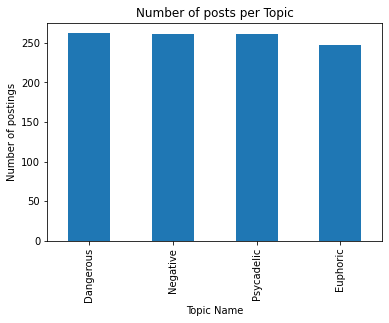

In [28]:
import matplotlib.pyplot as plt

combined_df['effect'].value_counts().plot.bar(x=None, y=None)
plt.title('Number of posts per Topic')
plt.xlabel('Topic Name')
plt.ylabel('Number of postings')

In [31]:
mask1 = (combined_df['effect'] == 'Dangerous') & (combined_df['drug_terms'] != '')
mask2 = (combined_df['effect'] == 'Negative') & (combined_df['drug_terms'] != '')
mask3 = (combined_df['effect'] == 'Psycadelic') & (combined_df['drug_terms'] != '')
mask4 = (combined_df['effect'] == 'Euphoric') & (combined_df['drug_terms'] != '')

dangerous = combined_df[mask1]
negative = combined_df[mask2]
psycadelic = combined_df[mask3]
euphoric = combined_df[mask4]

dangerous_drugs = []
for i in dangerous.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            dangerous_drugs.append(i)
            
negative_drugs = []
for i in negative.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            negative_drugs.append(i)
            
psycadelic_drugs = []
for i in psycadelic.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            psycadelic_drugs.append(i)
            
euphoric_drugs = []
for i in euphoric.drug_terms:
    if i != '':
        i = i.split()
        for i in i:
            euphoric_drugs.append(i)
            
dangerous_df = pd.DataFrame(dangerous_drugs)
negative_df = pd.DataFrame(negative_drugs)
psycadelic_df = pd.DataFrame(psycadelic_drugs)
euphoric_df = pd.DataFrame(euphoric_drugs)

In [45]:
len(euphoric_df)

411

Text(0, 0.5, 'Number of postings')

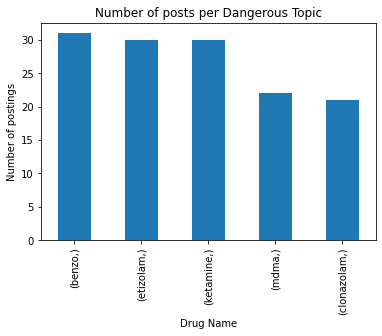

In [35]:
dangerous_df.value_counts().head(5).plot.bar(x=None, y=None)
plt.title('Number of posts per Dangerous Topic')
plt.xlabel('Drug Name')
plt.ylabel('Number of postings')

Text(0, 0.5, 'Number of postings')

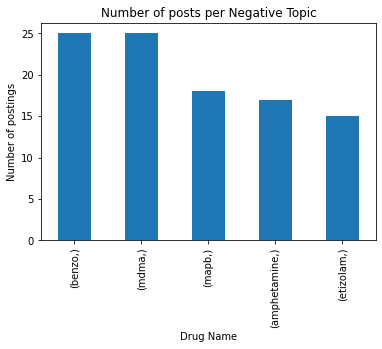

In [39]:
negative_df.value_counts().head(5).plot.bar(x=None, y=None)
plt.title('Number of posts per Negative Topic')
plt.xlabel('Drug Name')
plt.ylabel('Number of postings')

Text(0, 0.5, 'Number of postings')

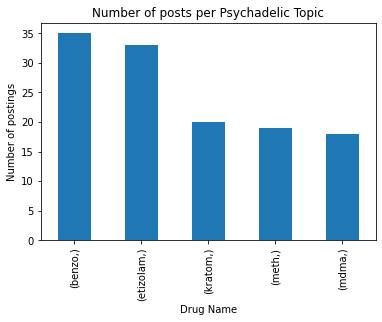

In [40]:
psycadelic_df.value_counts().head(5).plot.bar(x=None, y=None)
plt.title('Number of posts per Psychadelic Topic')
plt.xlabel('Drug Name')
plt.ylabel('Number of postings')

Text(0, 0.5, 'Number of postings')

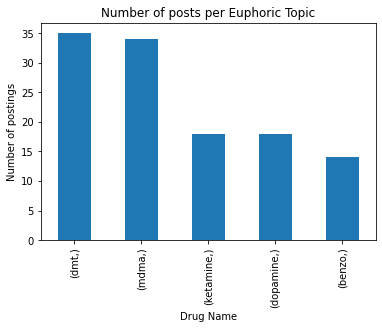

In [41]:
euphoric_df.value_counts().head(5).plot.bar(x=None, y=None)
plt.title('Number of posts per Euphoric Topic')
plt.xlabel('Drug Name')
plt.ylabel('Number of postings')

In [80]:
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

from bokeh.models import ColorBar, ColumnDataSource
from bokeh.palettes import Spectral6
from bokeh.plotting import figure, output_file, show
from bokeh.transform import linear_cmap
from bokeh.palettes import d3
import matplotlib.colors as mcolors


# Get topic weights
topic_weights = doc_topic


# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1027 samples in 0.001s...
[t-SNE] Computed neighbors for 1027 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1027
[t-SNE] Computed conditional probabilities for sample 1027 / 1027
[t-SNE] Mean sigma: 0.017706
[t-SNE] KL divergence after 250 iterations with early exaggeration: 52.255116
[t-SNE] KL divergence after 1000 iterations: 0.270119


In [81]:
# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4

mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1],color=mycolors[topic_num])
show(plot)

Loading BokehJS ...